In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
import json

### data preprocessing & EDA

In [2]:
df = pd.read_excel(r'B組.xlsx')

In [3]:
df_woid = df.drop(['員工ID','被保人ID'], axis=1)

In [4]:
df_woid = pd.get_dummies(df_woid, columns=['關係別','性別','教育程度/學歷','婚姻狀況','繳費方式_有信用卡自動扣款之保單', '繳費方式_有自動轉帳扣款之保單', '繳費方式_有自行繳費之保單(Y/N)',
       '是否加入官網會員(保單認證)(Y/N)', '是否申辦電子單據(Y/N)', '是否有手機', '是否有E-MAIL',
       '是否訂閱國壽電子報(Y/N)', '是否訂閱投資理財(Y/N)', '是否訂閱今日國泰電子報(Y/N)',
       '是否所有保單皆為網路投保(官網)件(Y/N)', '國壽內是否可電子郵件行銷指標(Y/N)','九大客群'])

In [5]:
df_woid_nan = df_woid.fillna(0)

In [53]:
data = df_woid_nan.to_numpy()

#### 視覺化

In [6]:
df_woid_nan.describe()

,年齡,身高,體重,關係別_子女,關係別_本人,關係別_父母,關係別_配偶,性別_1,性別_2,教育程度/學歷_國中及以下..,...,國壽內是否可電子郵件行銷指標(Y/N)_Y,九大客群_A_未來領袖,九大客群_B_尊榮顧客,九大客群_C_明日之星,九大客群_D_新貴族群,九大客群_E_卓越人士,九大客群_F_潛力新人,九大客群_G_小康務實,九大客群_H_保守謹慎,九大客群_I_高齡長青
count,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,...,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000
mean,39.676615,69.426988,24.751013,0.001705,0.986783,0.001705,0.009806,0.228310,0.771690,0.011511,...,0.606480,0.004477,0.040503,0.021317,0.022170,0.097847,0.142400,0.120443,0.140695,0.020678
std,13.613711,80.162194,29.296285,0.041266,0.114214,0.041266,0.098549,0.419788,0.419788,0.106683,...,0.488582,0.066765,0.197157,0.144456,0.147252,0.297139,0.349498,0.325514,0.347744,0.142319
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,160.000000,54.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82.000000,188.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# 身高平均
data.T[1][np.nonzero(data.T[1])].mean()

161.6287841191067

In [57]:
# 體重平均
data.T[2][np.nonzero(data.T[2])].mean()

57.62133995037221

In [7]:
df_woid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   年齡                        4691 non-null   int64  
 1   身高                        2015 non-null   float64
 2   體重                        2015 non-null   float64
 3   關係別_子女                    4691 non-null   uint8  
 4   關係別_本人                    4691 non-null   uint8  
 5   關係別_父母                    4691 non-null   uint8  
 6   關係別_配偶                    4691 non-null   uint8  
 7   性別_1                      4691 non-null   uint8  
 8   性別_2                      4691 non-null   uint8  
 9   教育程度/學歷_國中及以下..           4691 non-null   uint8  
 10  教育程度/學歷_大學/專科..           4691 non-null   uint8  
 11  教育程度/學歷_研究所以上             4691 non-null   uint8  
 12  教育程度/學歷_高中職..             4691 non-null   uint8  
 13  婚姻狀況_其他(同居、離婚等)           4691 non-null   uint8  
 14  婚姻狀況_已婚 

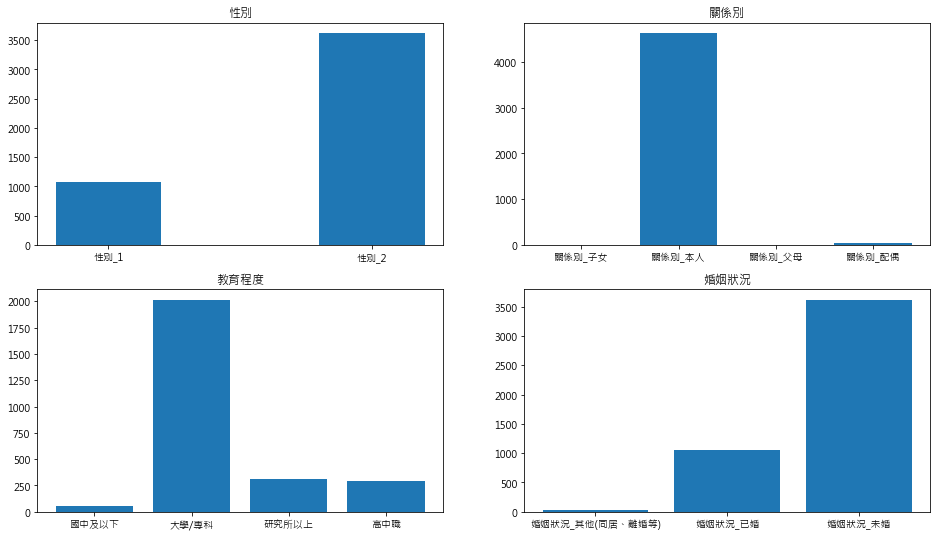

In [31]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
fig , ax = plt.subplots(2, 2, figsize=(16,9))
ax[0,0].bar(['性別_1','性別_2'], [df_woid_nan['性別_1'].sum(), df_woid_nan['性別_2'].sum()],
        width=0.4, 
        align='center',
       )
ax[0,0].set_title('性別')
ax[0,1].bar(['關係別_子女','關係別_本人','關係別_父母','關係別_配偶'], [df_woid_nan['關係別_子女'].sum(), df_woid_nan['關係別_本人'].sum(), df_woid_nan['關係別_父母'].sum(), df_woid_nan['關係別_配偶'].sum()],
        align='center',
       )
ax[0,1].set_title('關係別')
ax[1,0].bar(['國中及以下','大學/專科','研究所以上','高中職'], [df_woid_nan['教育程度/學歷_國中及以下..'].sum(), df_woid_nan['教育程度/學歷_大學/專科..'].sum(), df_woid_nan['教育程度/學歷_研究所以上'].sum(), df_woid_nan['教育程度/學歷_高中職..'].sum()],
        align='center',
       )
ax[1,0].set_title('教育程度')
ax[1,1].bar(['婚姻狀況_其他(同居、離婚等)','婚姻狀況_已婚','婚姻狀況_未婚'], [df_woid_nan['婚姻狀況_其他(同居、離婚等)'].sum(), df_woid_nan['婚姻狀況_已婚'].sum(), df_woid_nan['婚姻狀況_未婚'].sum()],
        align='center',
       )
ax[1,1].set_title('婚姻狀況')
plt.show()

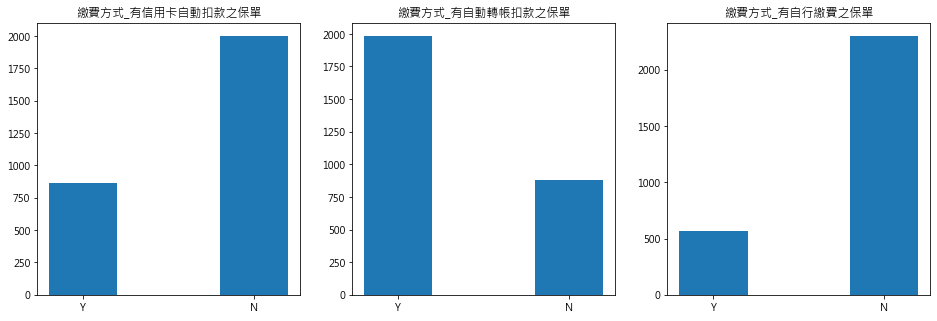

In [63]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
fig , ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].bar(['Y','N'], [df_woid_nan['繳費方式_有信用卡自動扣款之保單_Y'].sum(), df_woid_nan['繳費方式_有信用卡自動扣款之保單_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[0].set_title('繳費方式_有信用卡自動扣款之保單')
ax[1].bar(['Y','N'], [df_woid_nan['繳費方式_有自動轉帳扣款之保單_Y'].sum(), df_woid_nan['繳費方式_有自動轉帳扣款之保單_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[1].set_title('繳費方式_有自動轉帳扣款之保單')
ax[2].bar(['Y','N'], [df_woid_nan['繳費方式_有自行繳費之保單(Y/N)_Y'].sum(), df_woid_nan['繳費方式_有自行繳費之保單(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[2].set_title('繳費方式_有自行繳費之保單')
plt.show()

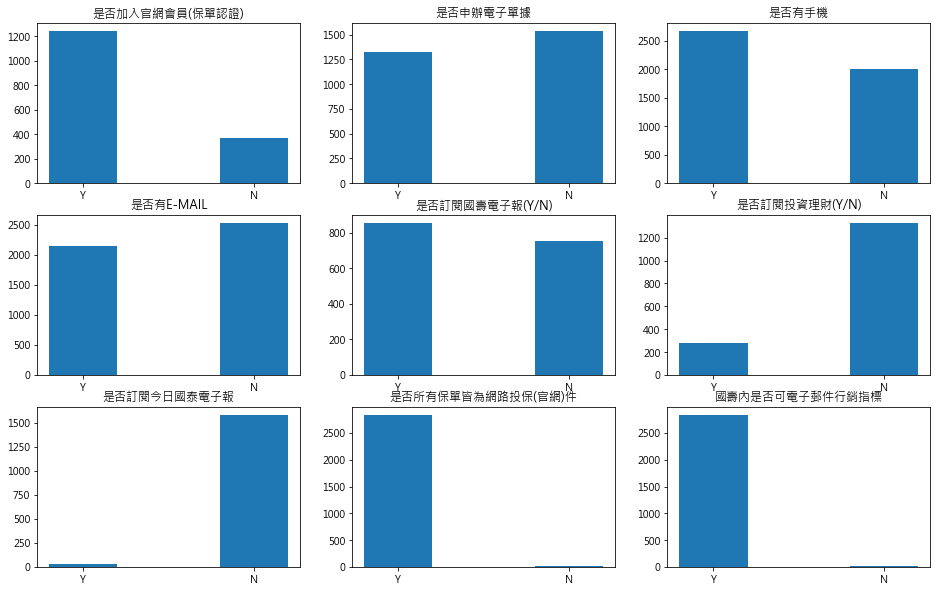

In [62]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
fig , ax = plt.subplots(3, 3, figsize=(16,10))
ax[0,0].bar(['Y','N'], [df_woid_nan['是否加入官網會員(保單認證)(Y/N)_Y'].sum(), df_woid_nan['是否加入官網會員(保單認證)(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[0,0].set_title('是否加入官網會員(保單認證)')
ax[0,1].bar(['Y','N'], [df_woid_nan['是否申辦電子單據(Y/N)_Y'].sum(), df_woid_nan['是否申辦電子單據(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[0,1].set_title('是否申辦電子單據')
ax[0,2].bar(['Y','N'], [df_woid_nan['是否有手機_Y'].sum(), 4690 - df_woid_nan['是否有手機_Y'].sum()],
        width=0.4, 
        align='center',
       )
ax[0,2].set_title('是否有手機')
ax[1,0].bar(['Y','N'], [df_woid_nan['是否有E-MAIL_Y'].sum(), 4690 - df_woid_nan['是否有E-MAIL_Y'].sum()],
        width=0.4, 
        align='center',
       )
ax[1,0].set_title('是否有E-MAIL')
ax[1,1].bar(['Y','N'], [df_woid_nan['是否訂閱國壽電子報(Y/N)_Y'].sum(), df_woid_nan['是否訂閱國壽電子報(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[1,1].set_title('是否訂閱國壽電子報(Y/N)')
ax[1,2].bar(['Y','N'], [df_woid_nan['是否訂閱投資理財(Y/N)_Y'].sum(), df_woid_nan['是否訂閱投資理財(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[1,2].set_title('是否訂閱投資理財(Y/N)')
ax[2,0].bar(['Y','N'], [df_woid_nan['是否訂閱今日國泰電子報(Y/N)_Y'].sum(), df_woid_nan['是否訂閱今日國泰電子報(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[2,0].set_title('是否訂閱今日國泰電子報')
ax[2,1].bar(['Y','N'], [df_woid_nan['是否所有保單皆為網路投保(官網)件(Y/N)_Y'].sum(), df_woid_nan['是否所有保單皆為網路投保(官網)件(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[2,1].set_title('是否所有保單皆為網路投保(官網)件')
ax[2,2].bar(['Y','N'], [df_woid_nan['國壽內是否可電子郵件行銷指標(Y/N)_Y'].sum(), df_woid_nan['國壽內是否可電子郵件行銷指標(Y/N)_N'].sum()],
        width=0.4, 
        align='center',
       )
ax[2,2].set_title('國壽內是否可電子郵件行銷指標')
plt.show()

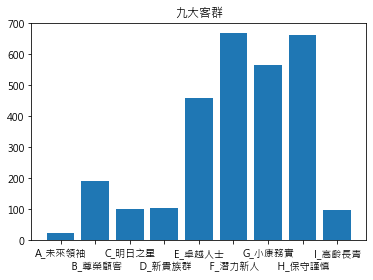

In [22]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.bar(['A_未來領袖','\n B_尊榮顧客','C_明日之星','\n D_新貴族群','E_卓越人士','\n F_潛力新人','G_小康務實','\n H_保守謹慎','I_高齡長青'], [df_woid_nan['九大客群_A_未來領袖'].sum(), df_woid_nan['九大客群_B_尊榮顧客'].sum(), df_woid_nan['九大客群_C_明日之星'].sum(),df_woid_nan['九大客群_D_新貴族群'].sum(),df_woid_nan['九大客群_E_卓越人士'].sum(),df_woid_nan['九大客群_F_潛力新人'].sum(),df_woid_nan['九大客群_G_小康務實'].sum(),df_woid_nan['九大客群_H_保守謹慎'].sum(),df_woid_nan['九大客群_I_高齡長青'].sum()],
        #width=0.4, 
        align='center',
       )
plt.title('九大客群')
plt.show()

#### correlation of relationship, years, and sex

In [105]:
np.corrcoef(data.T)[8][38:]

array([-0.00156336, -0.05054875,  0.03456674,  0.04395898,  0.04409173,
        0.03707462,  0.03275979, -0.01798861, -0.07799477])

### modeling or clustering 

#### logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

#### KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_woid_nan[df_woid_nan.columns[0:38]], df_woid_nan[df_woid_nan.columns[38:]],test_size=0.2,random_state=1)

In [14]:
clf = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance', algorithm='brute')
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=3, weights='distance')

In [15]:
clf.predict(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [16]:
clf.score(X_test,y_test)

0.6794462193823216

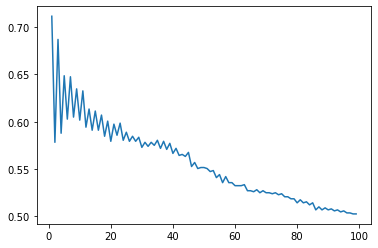

In [107]:
accuracy = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    k_range = range(1,100)
plt.plot(k_range, accuracy)
plt.show()

#### SVM

In [108]:
from sklearn import svm

In [109]:
svm = svm.SVC(kernel='rbf',C=1 ,gamma='auto')
svm.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape (3752, 9) instead.

#### k means

In [81]:
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans(n_clusters = 9)

In [83]:
kmeans.fit(df_woid_nan)

KMeans(n_clusters=9)

In [84]:
labels = kmeans.predict(df_woid_nan)
centroids = kmeans.cluster_centers_

In [17]:
"""
fig = plt.figure(figsize=(5, 5))

#colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df_woid['年齡'], df_woid['關係別_配偶'], alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show
"""

"\nfig = plt.figure(figsize=(5, 5))\n\n#colors = map(lambda x: colmap[x+1], labels)\n\nplt.scatter(df_woid['年齡'], df_woid['關係別_配偶'], alpha=0.5, edgecolor='k')\nfor idx, centroid in enumerate(centroids):\n    plt.scatter(*centroid)\nplt.xlim(0, 100)\nplt.ylim(0, 100)\nplt.show\n"